# Processing of Momeni masks

In [5]:
!pip install -e /home/cerebriu/data/RESEARCH/MicrobleedNet/
import nibabel as nib
import nilearn as nil
import numpy as np 
import sys
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist

import cmbnet.preprocessing.loading as loading
from cmbnet.preprocessing.datasets.momeni import load_MOMENI_raw,  perform_MOMENI_QC, load_MOMENI_data

import cmbnet.visualization.utils_plotting as utils_plt
import os
from typing import Tuple, List, Dict
import matplotlib.pyplot as plt


import importlib
import cmbnet
importlib.reload(cmbnet)


Obtaining file:///home/cerebriu/data/RESEARCH/MicrobleedNet
  Preparing metadata (setup.py) ... done
  Attempting uninstall: cmbnet
    Found existing installation: cmbnet 0.1.0
    Uninstalling cmbnet-0.1.0:
      Successfully uninstalled cmbnet-0.1.0
  Running setup.py develop for cmbnet

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


<module 'cmbnet' from '/home/cerebriu/data/RESEARCH/MicrobleedNet/cmbnet/__init__.py'>

In [6]:
input_dir = "/home/cerebriu/data/datasets/raw/MOMENI"
subjects = loading.get_dataset_subjects("momeni", input_dir)

In [7]:
class Args:
    def __init__(self, input_dir = "/home/cerebriu/data/datasets/raw/MOMENI", dataset_name="momeni"):
        self.input_dir = input_dir
        self.dataset_name = dataset_name
        self.plots_path = None

------------------------------------------------
239_T1_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(46, 160, 37), (53, 115, 39)]
(46, 160, 37)


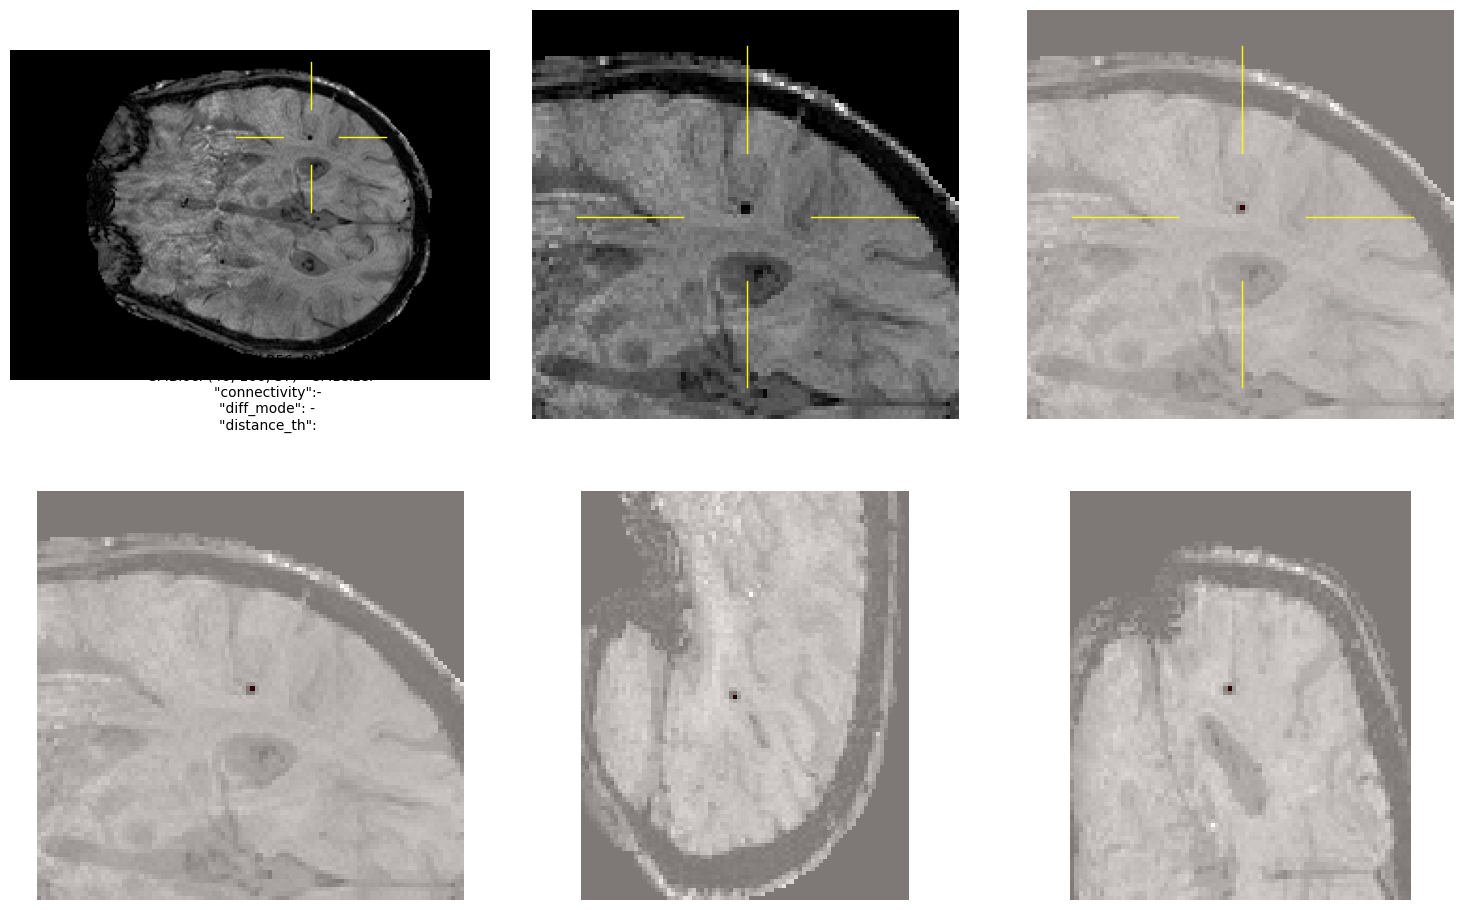

(53, 115, 39)


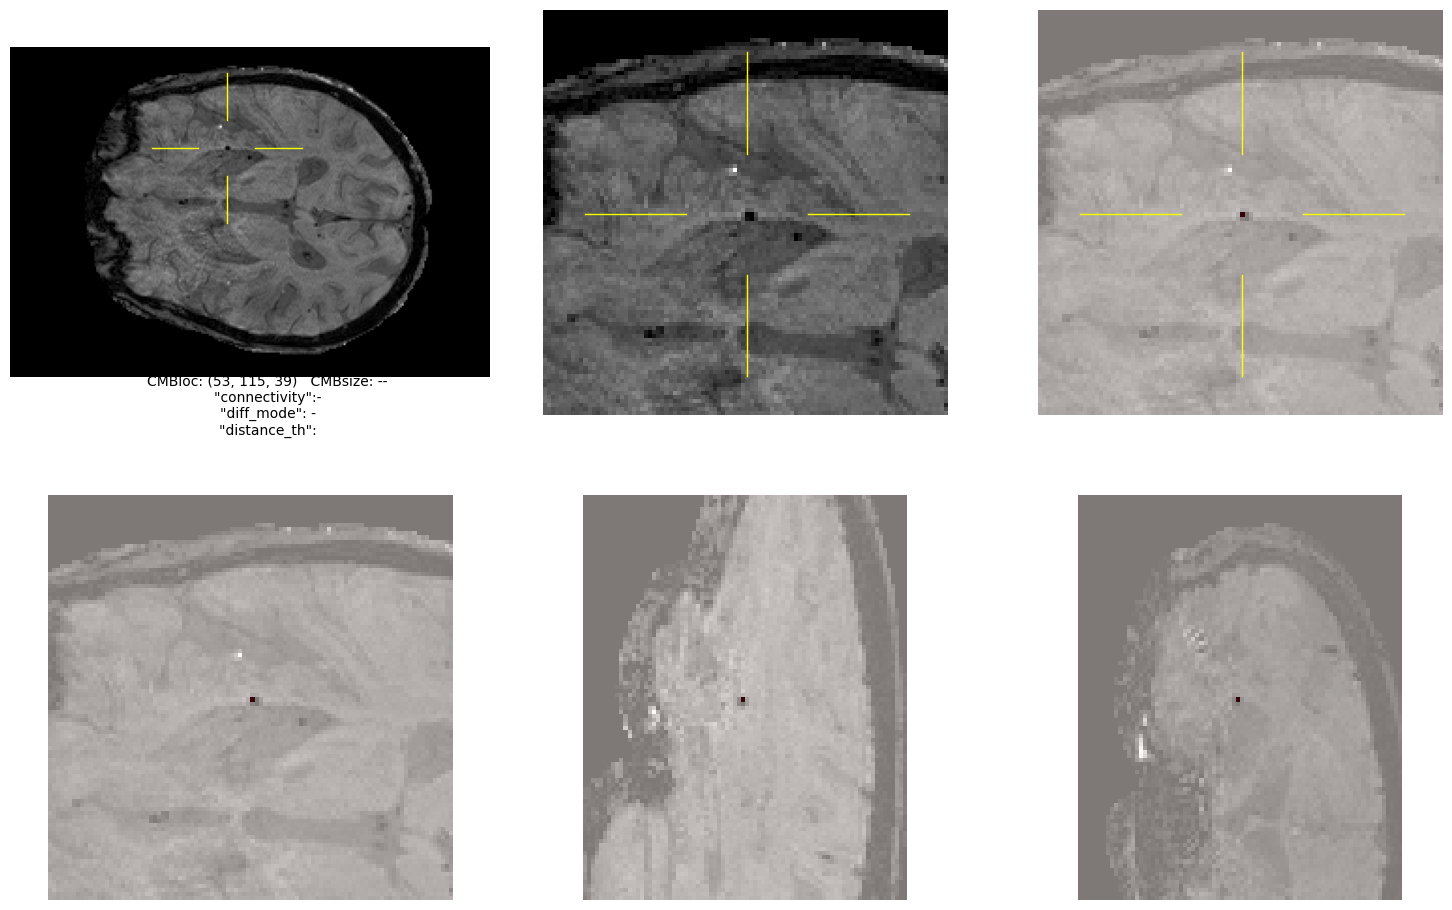

------------------------------------------------
273_T2_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(64, 198, 31), (40, 166, 50), (129, 102, 53), (63, 182, 34), (123, 185, 33)]
(64, 198, 31)


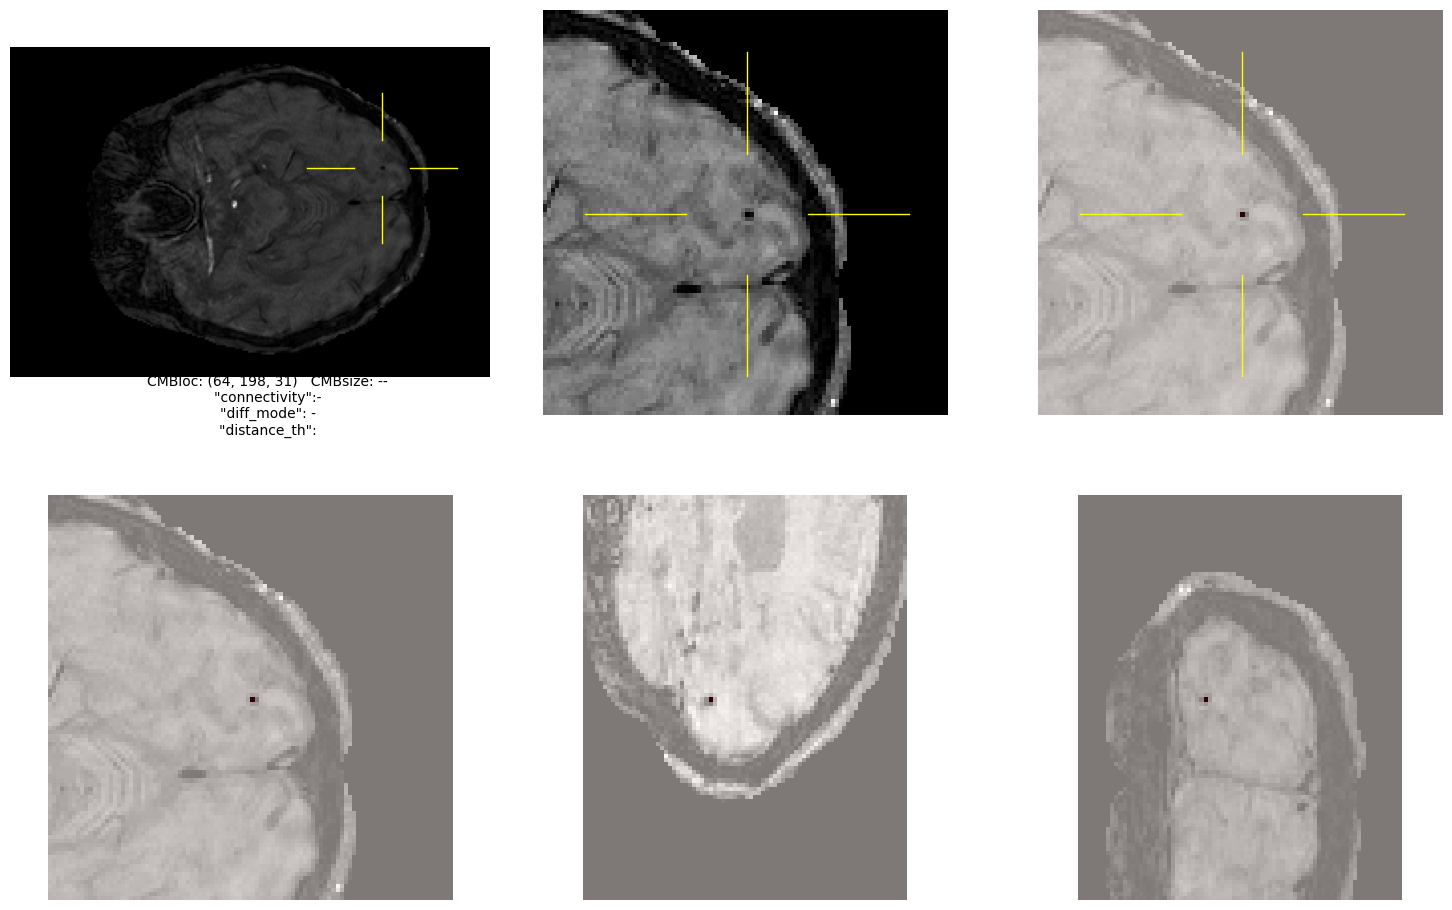

(40, 166, 50)


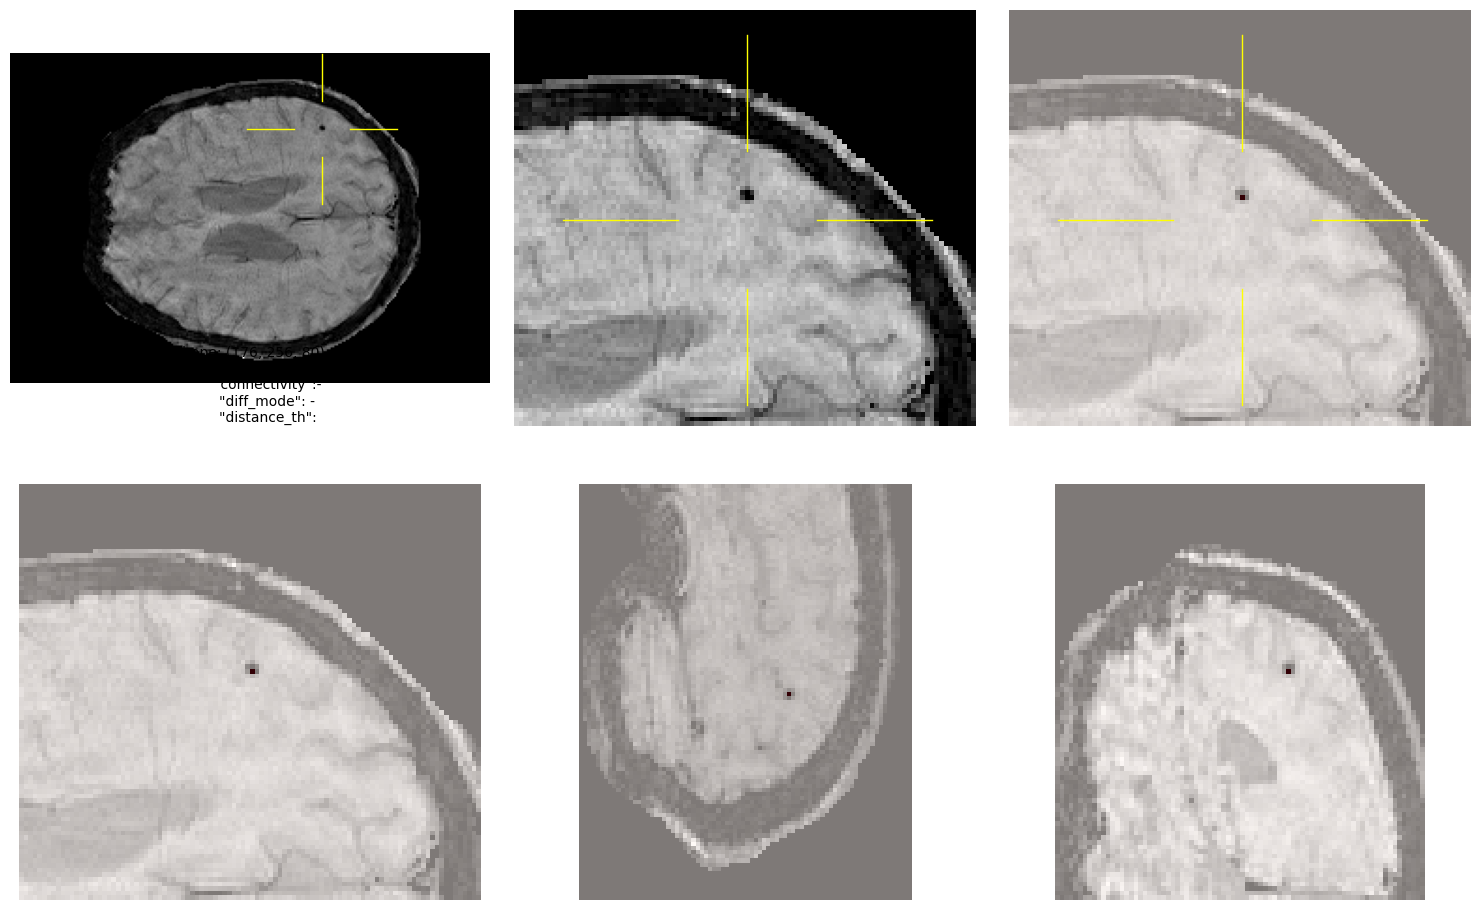

(129, 102, 53)


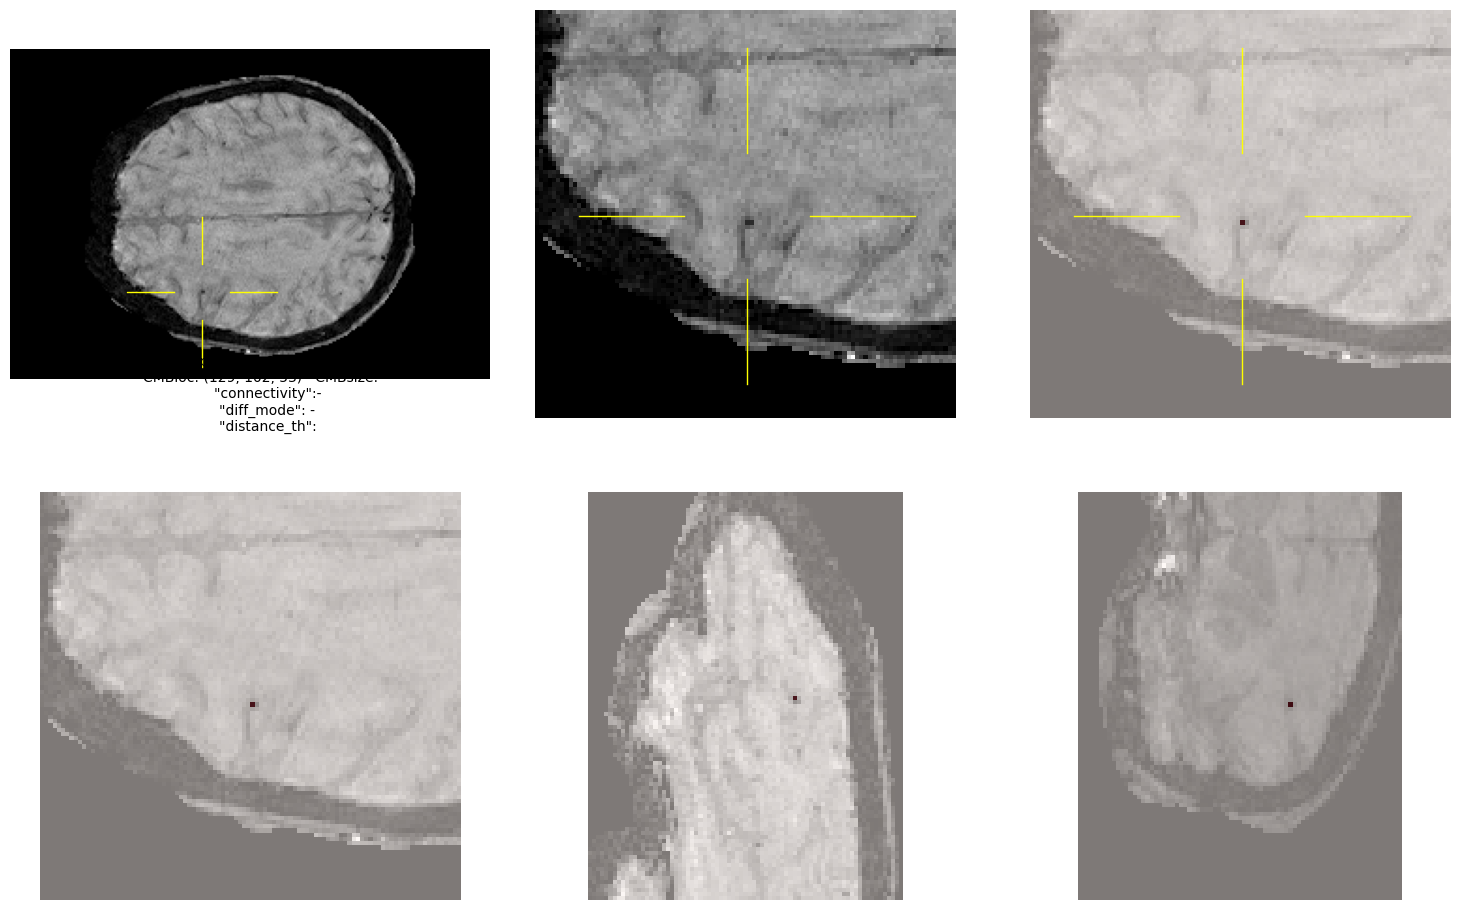

(63, 182, 34)


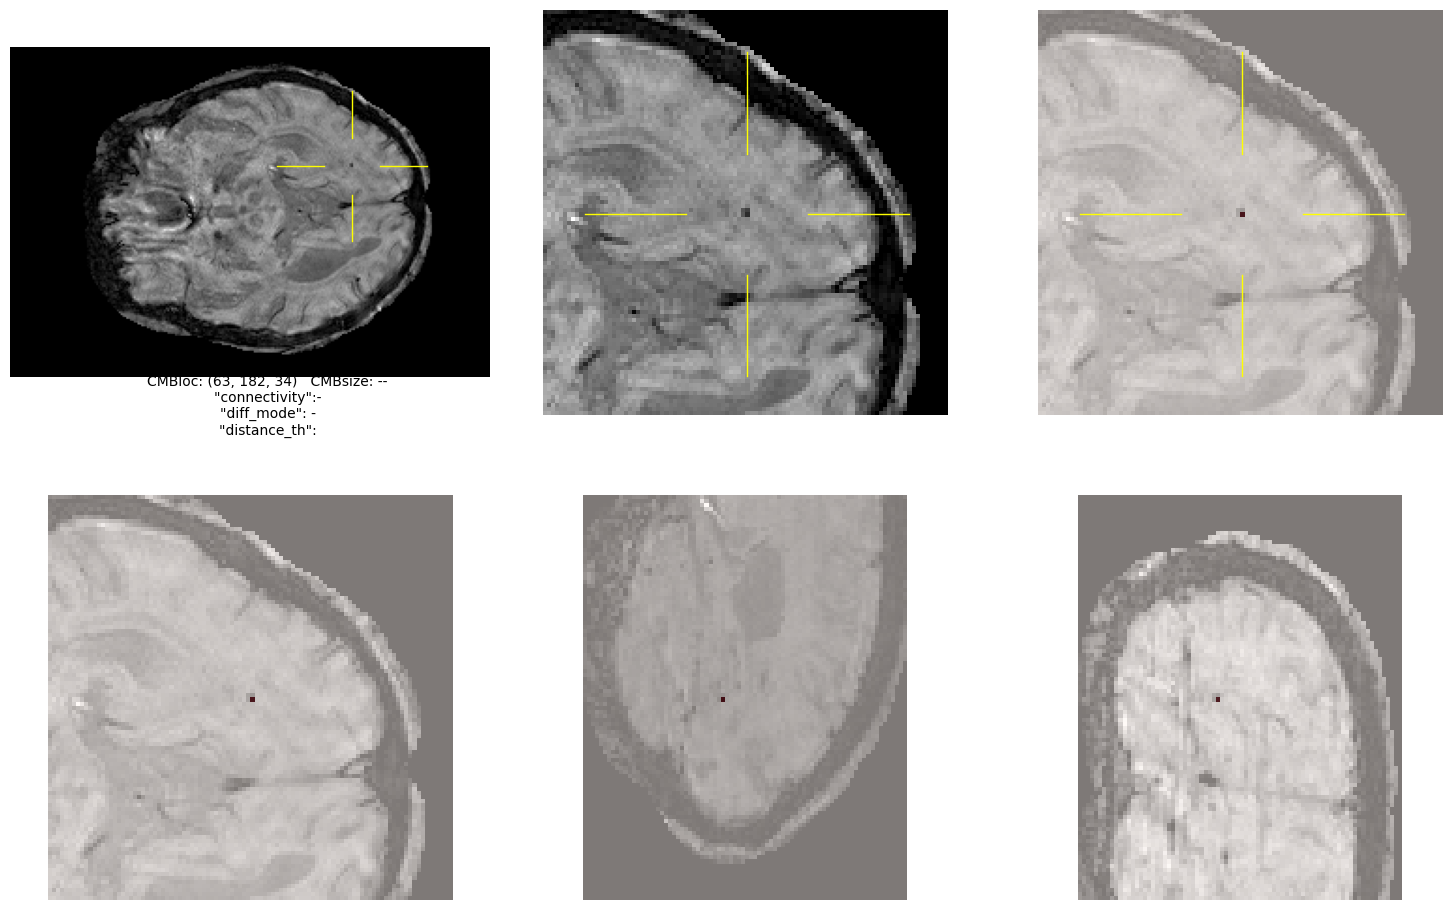

(123, 185, 33)


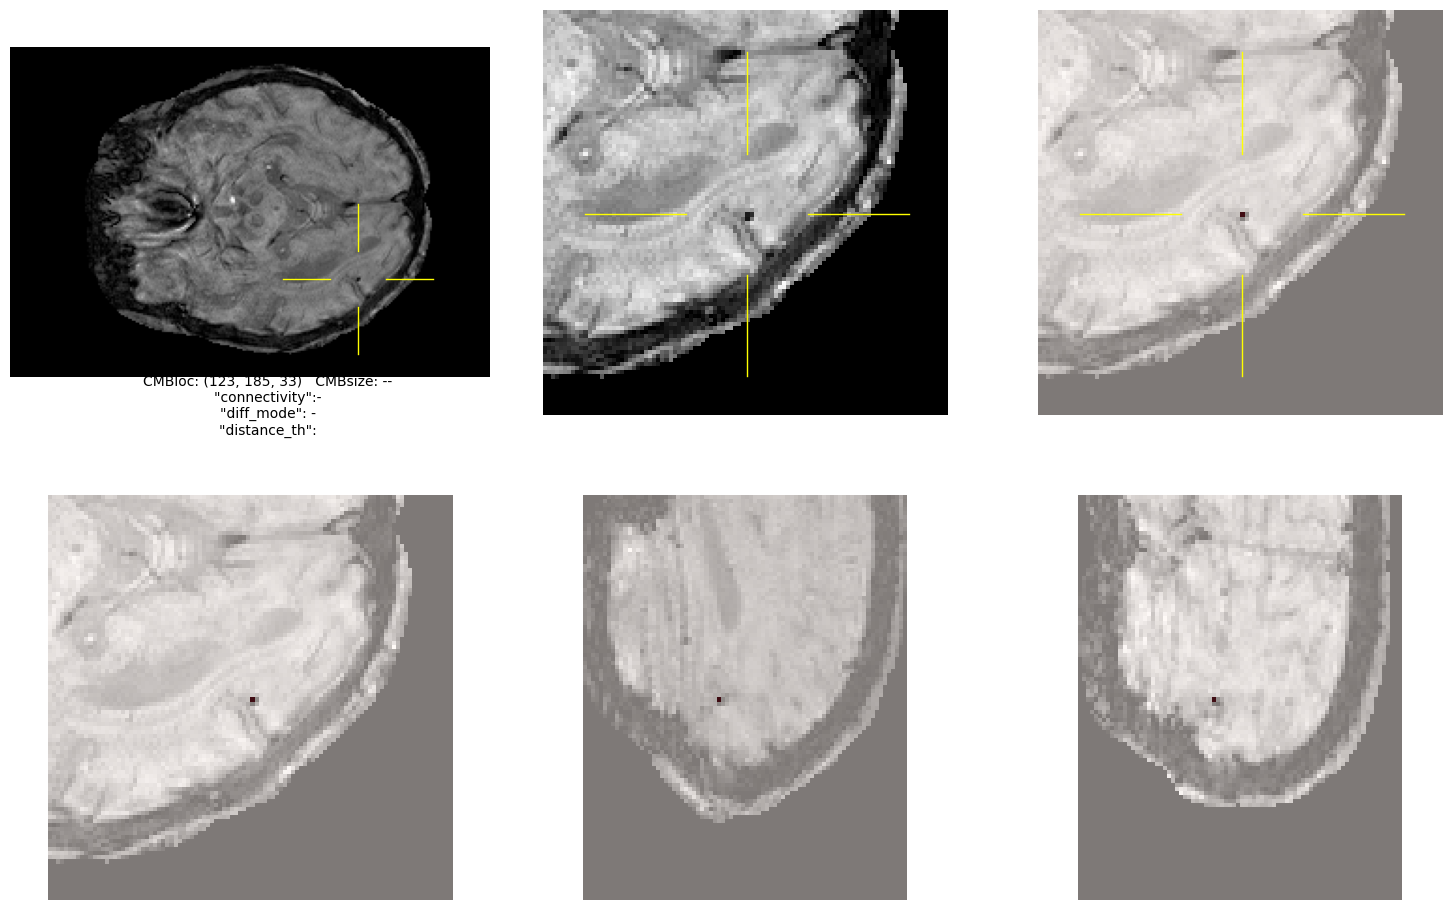

------------------------------------------------
294_T2_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(115, 164, 18), (34, 146, 55)]
(115, 164, 18)


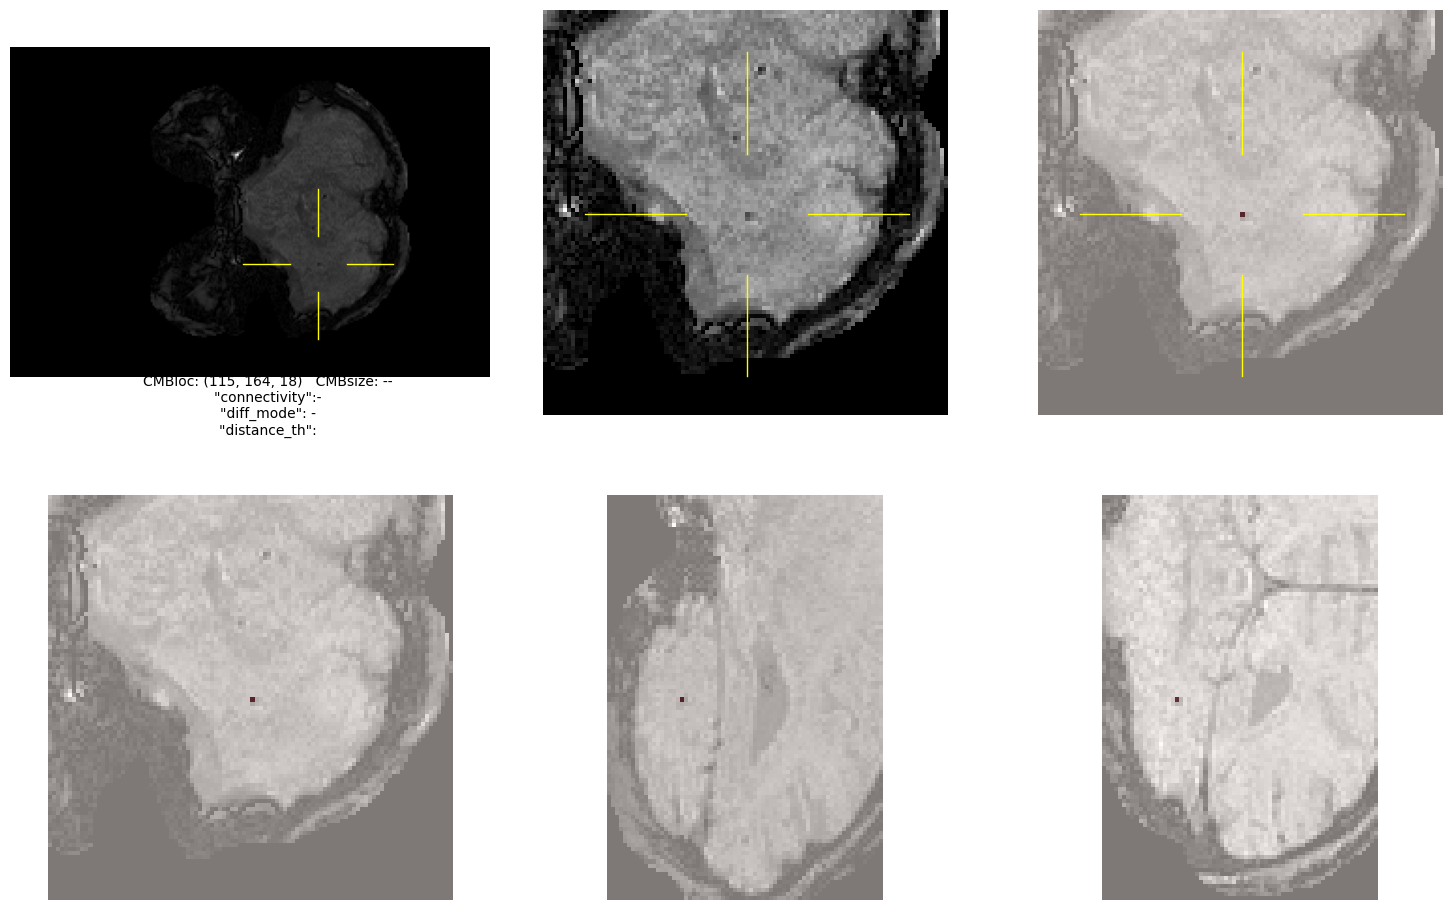

(34, 146, 55)


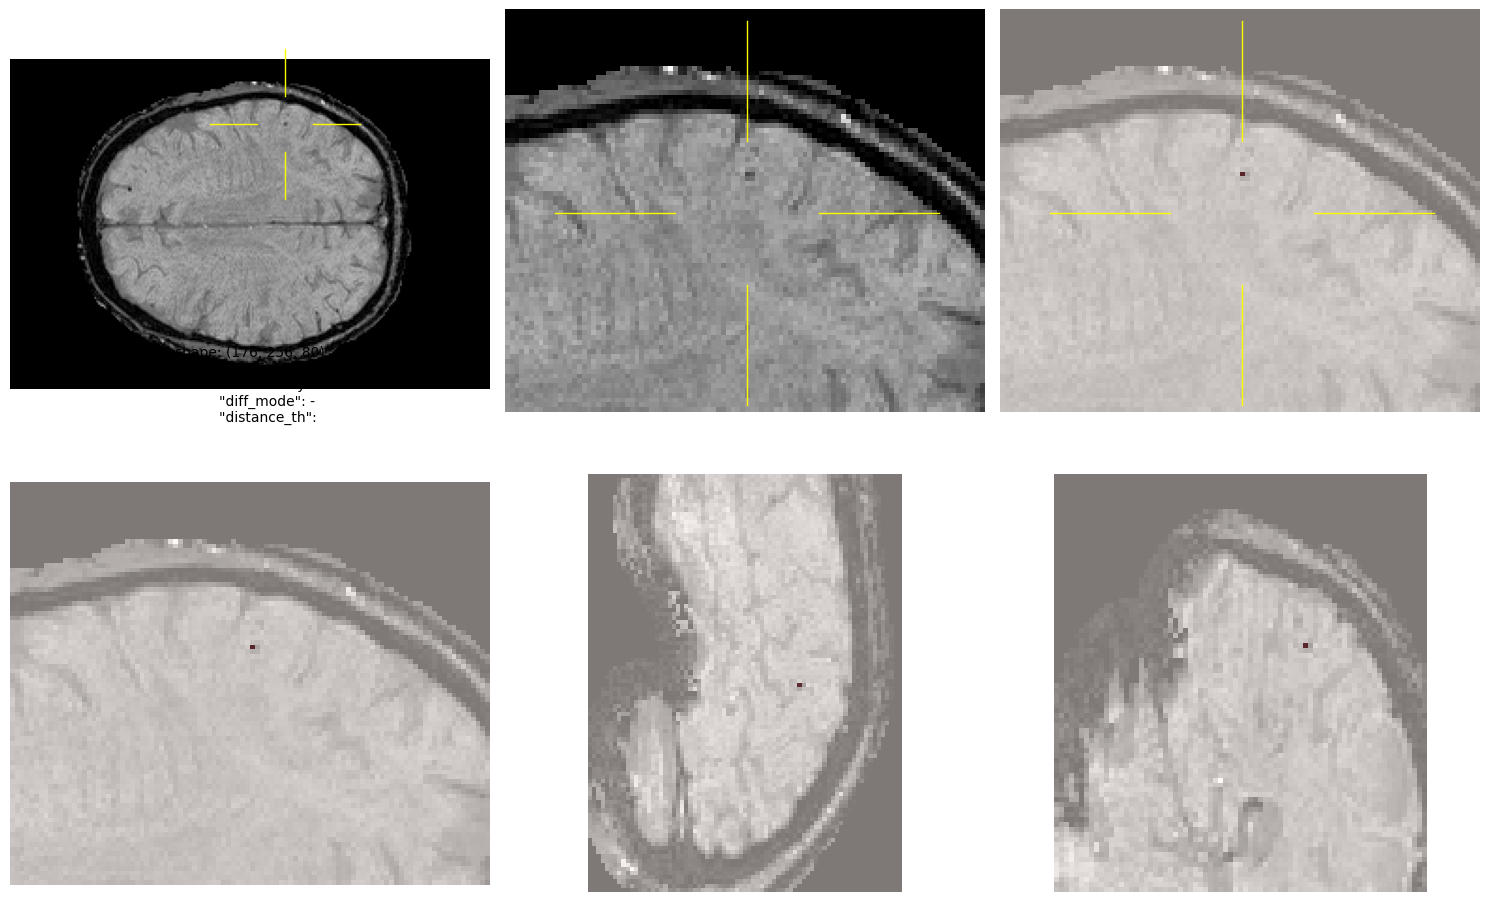

------------------------------------------------
276_T0_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(124, 187, 44)]
(124, 187, 44)


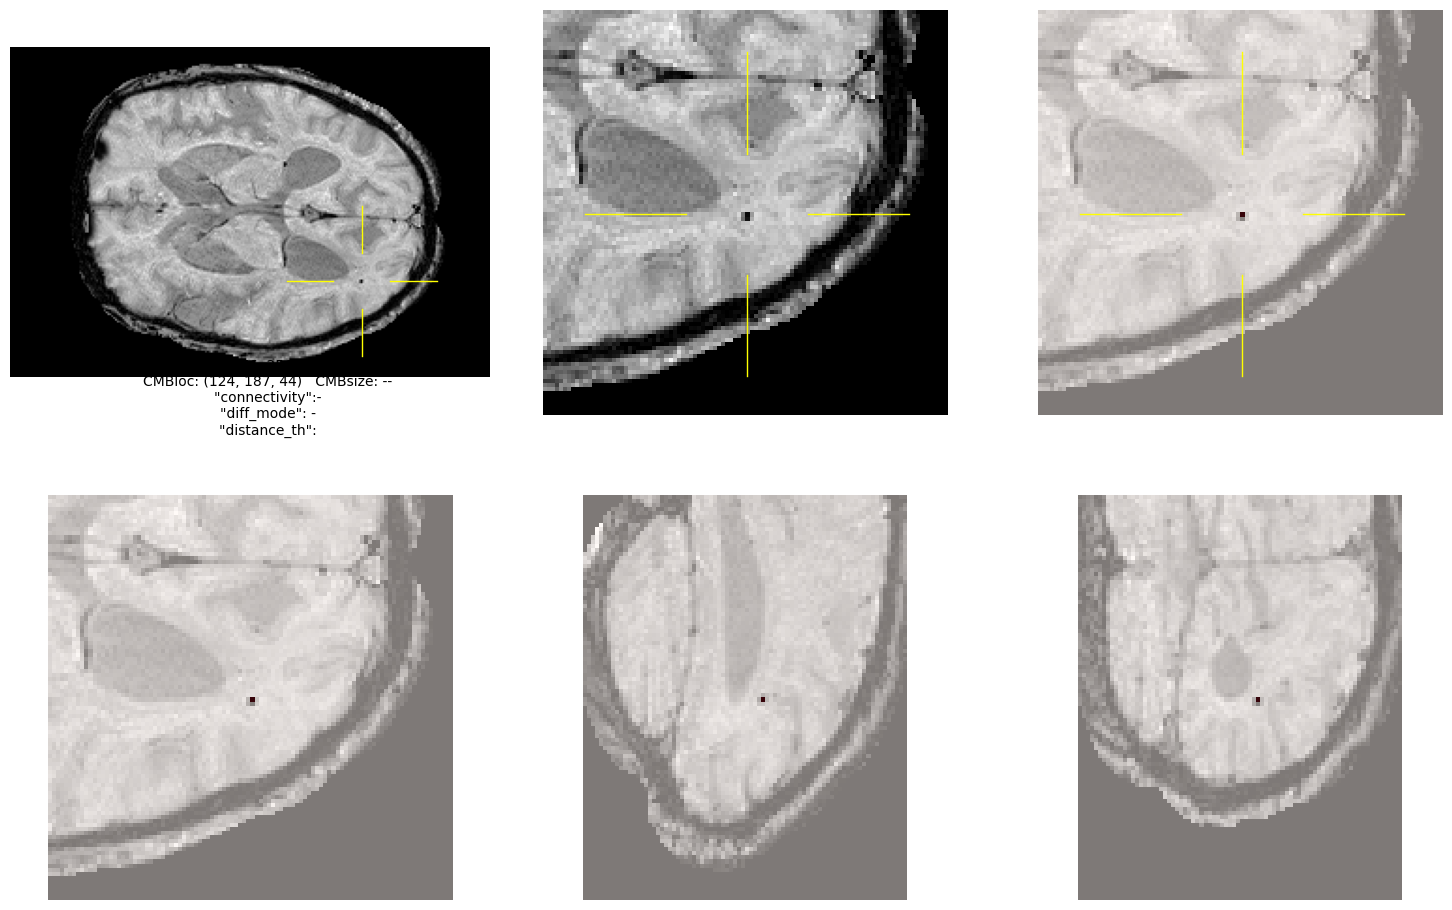

------------------------------------------------
274_T2_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(101, 63, 47)]
(101, 63, 47)


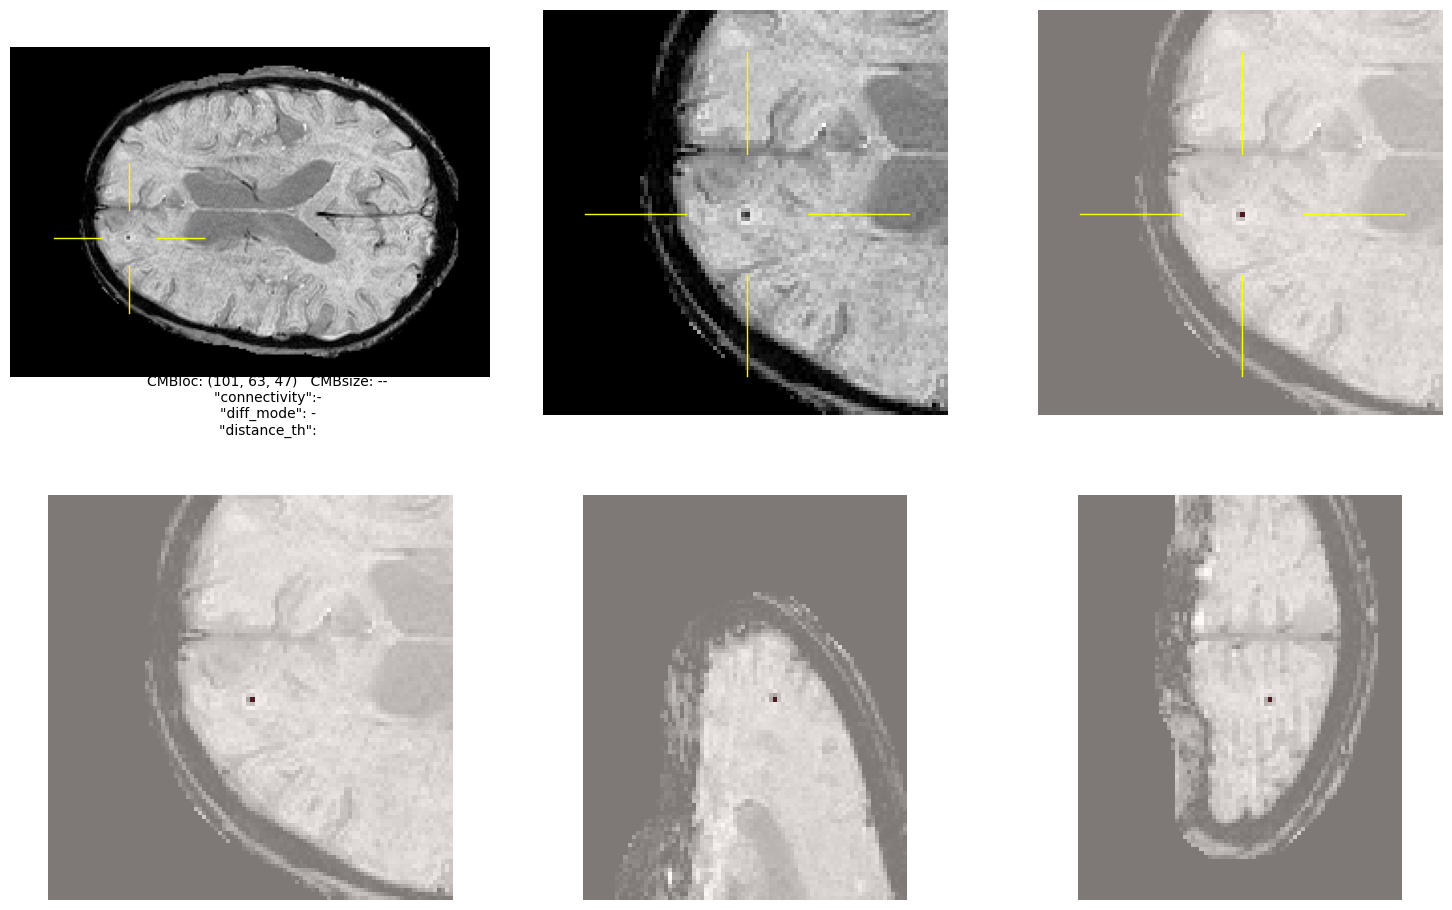

------------------------------------------------
222_T1_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(66, 218, 31), (92, 75, 63), (85, 99, 64)]
(66, 218, 31)


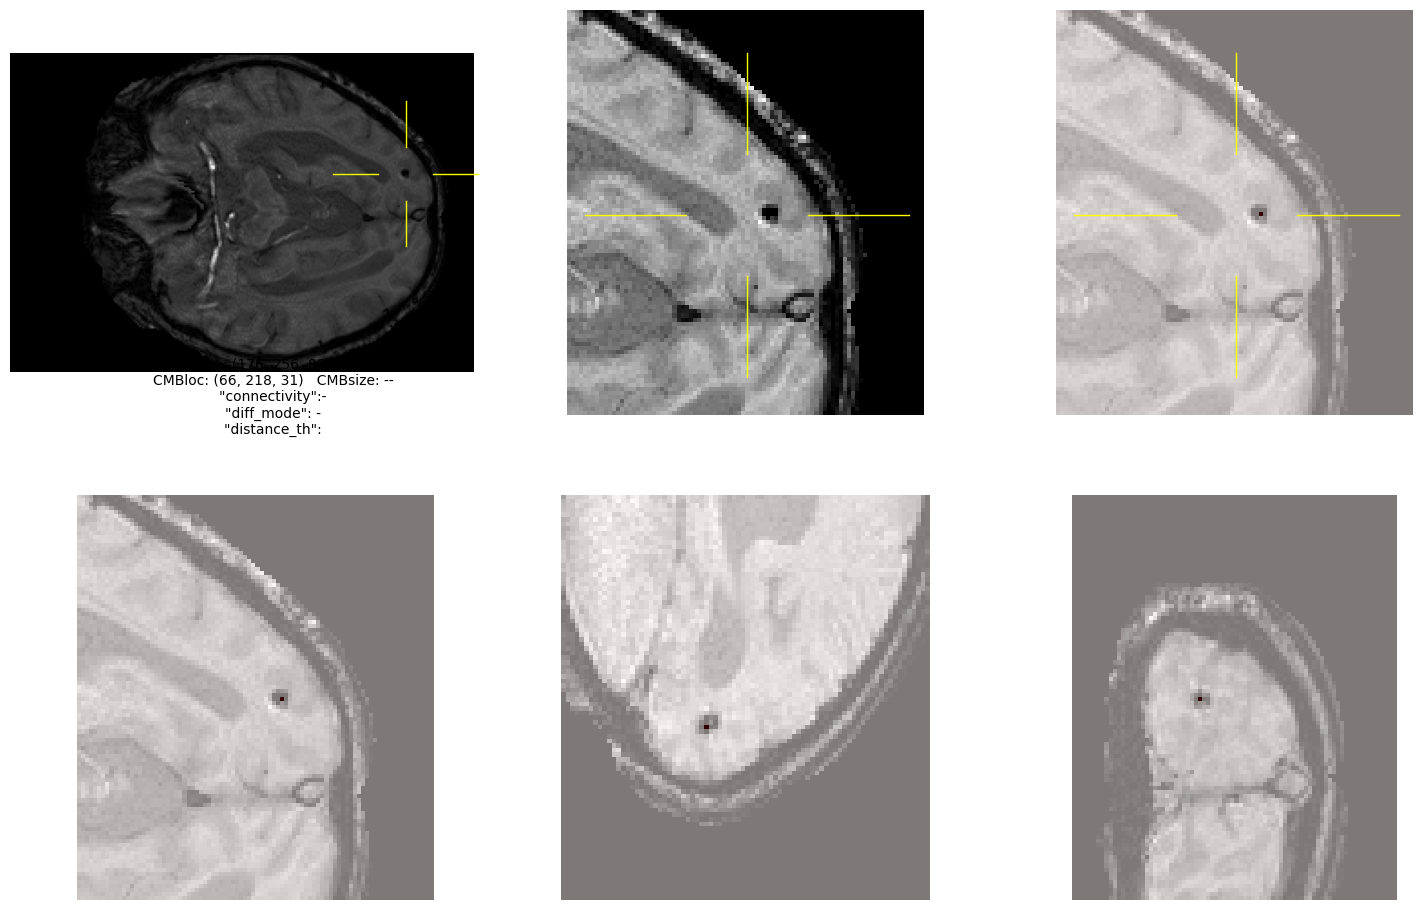

(92, 75, 63)


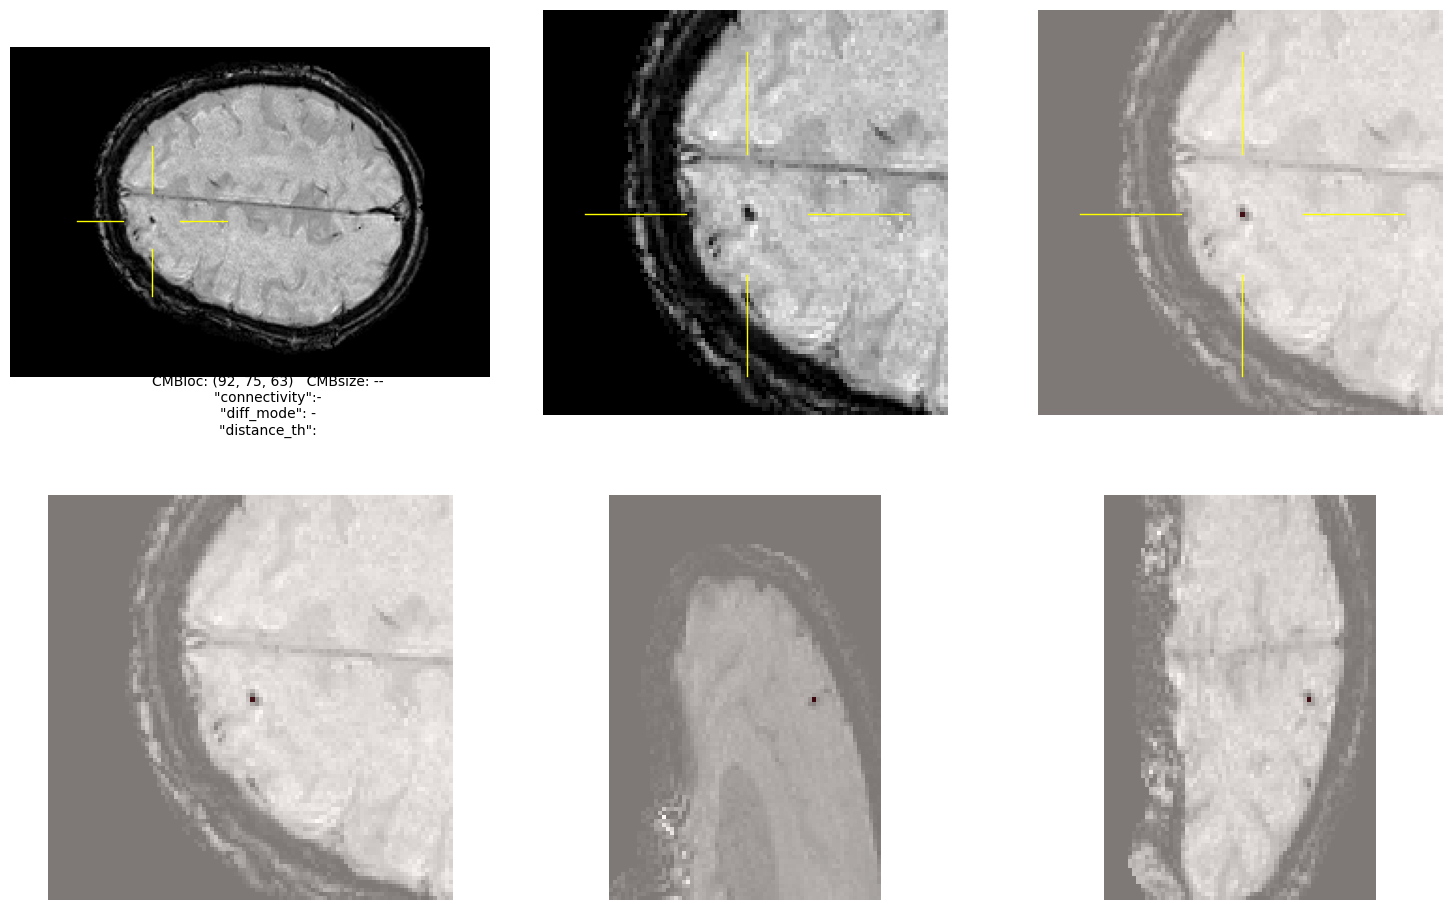

(85, 99, 64)


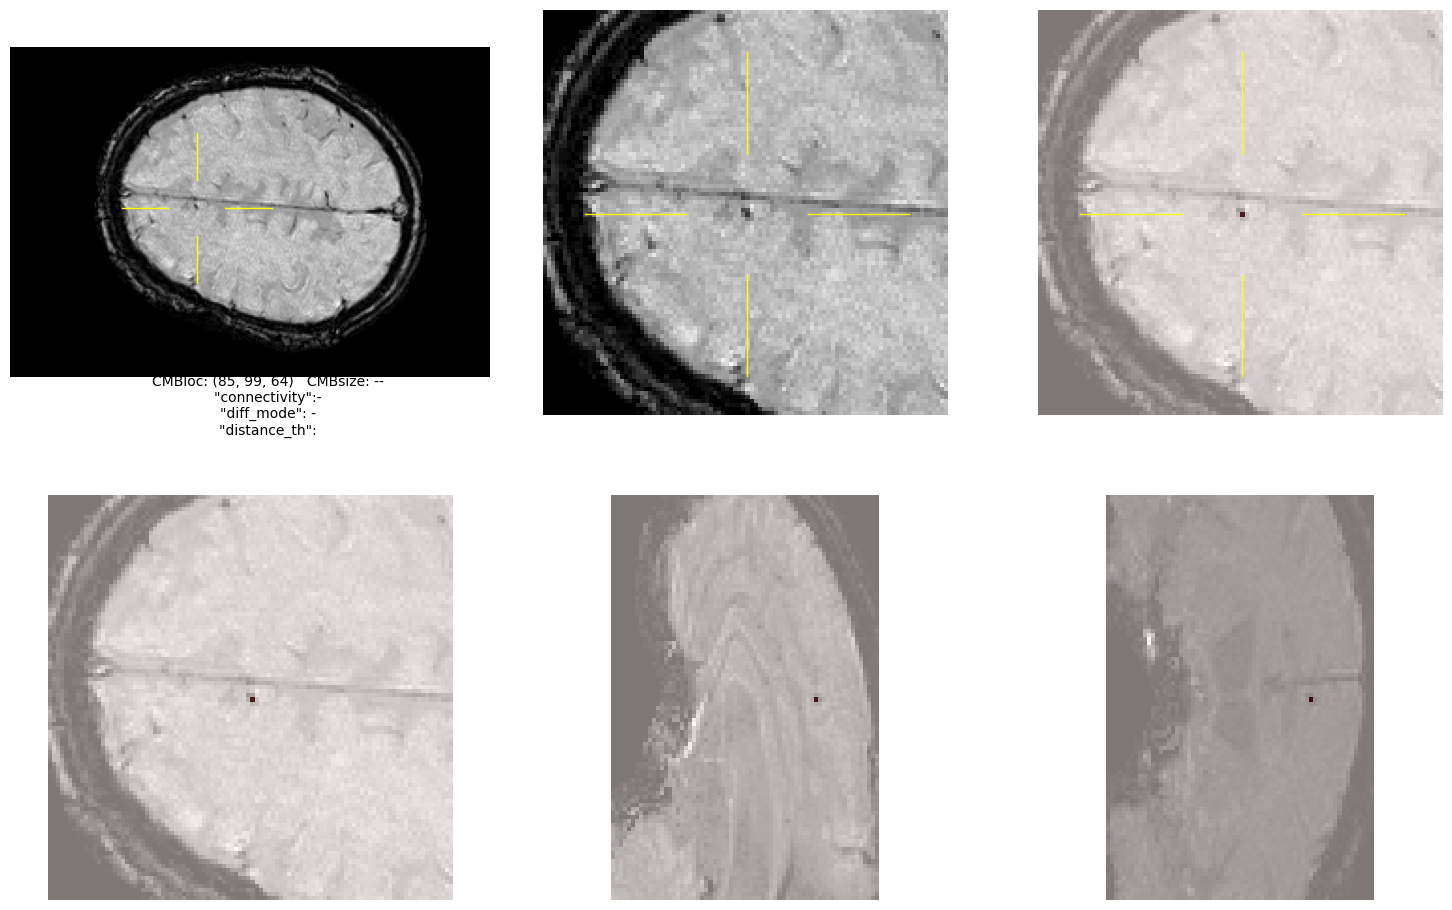

------------------------------------------------
238_T2_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(120, 171, 8), (127, 199, 33), (112, 74, 46), (64, 173, 8)]
(120, 171, 8)


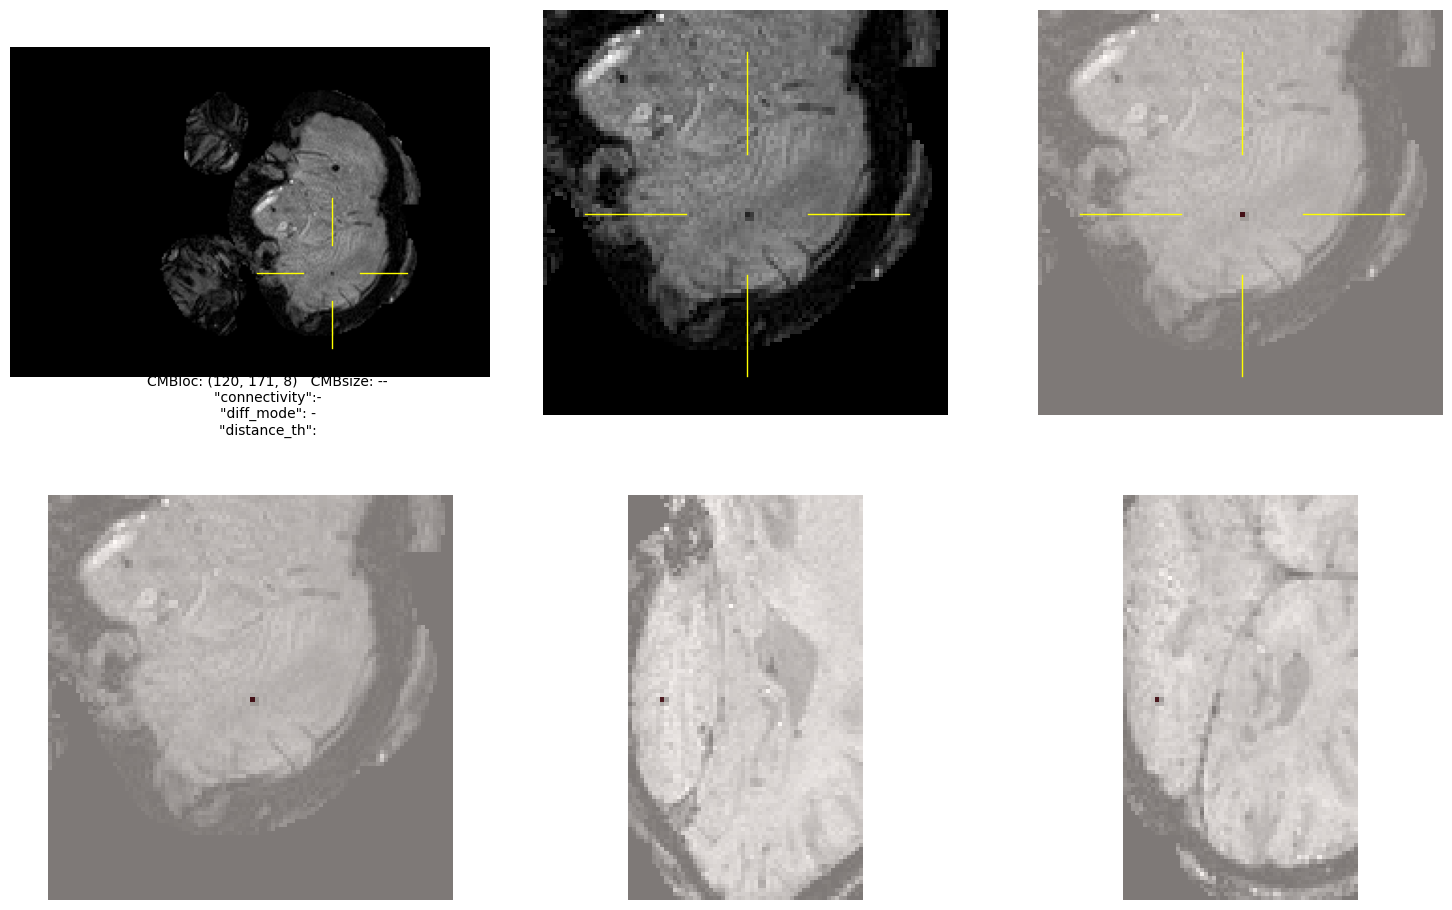

(127, 199, 33)


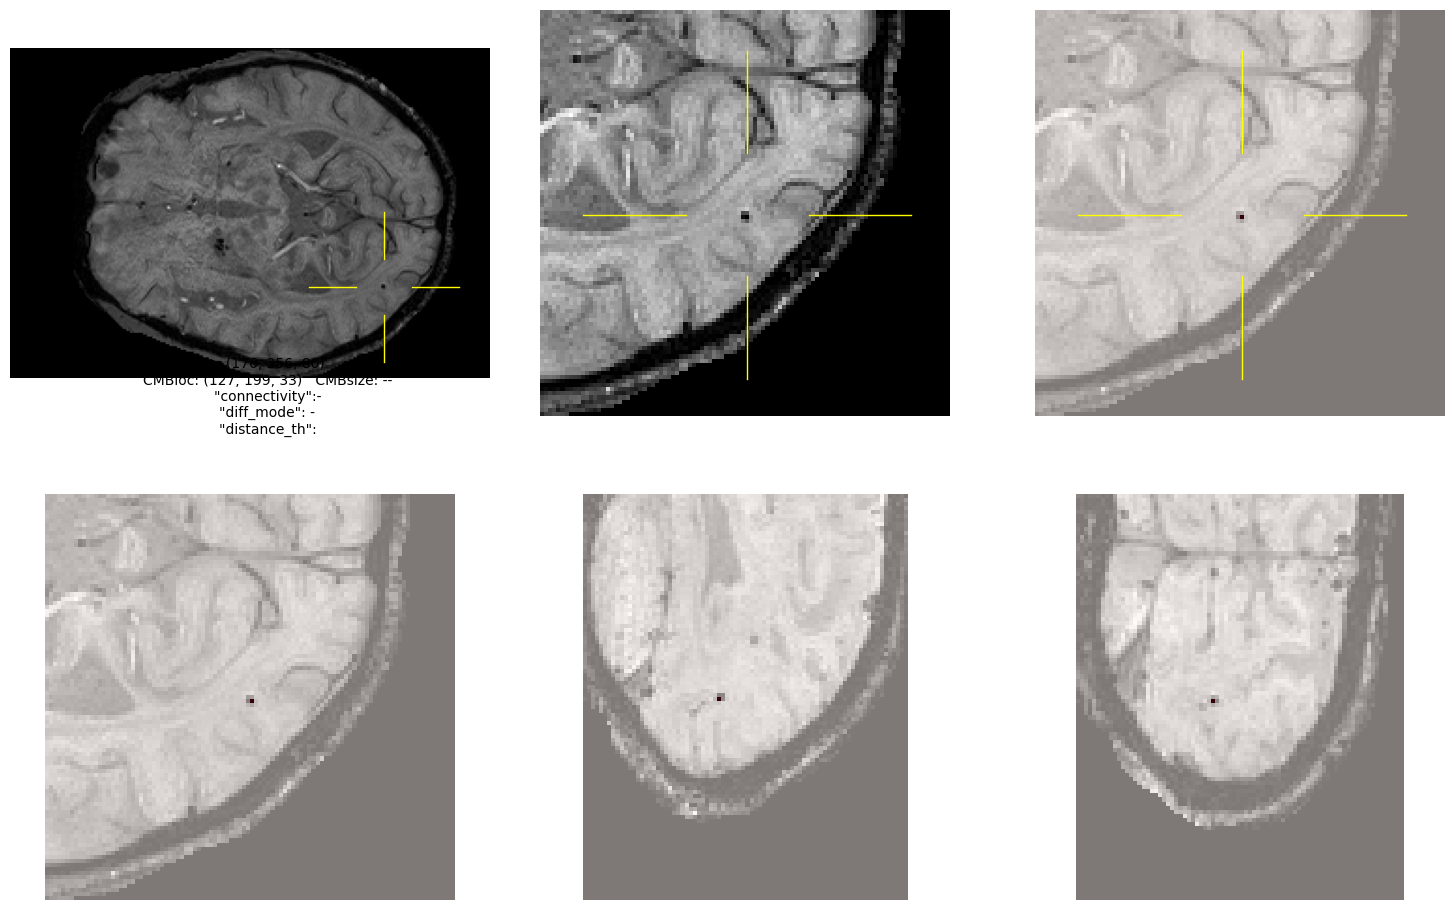

(112, 74, 46)


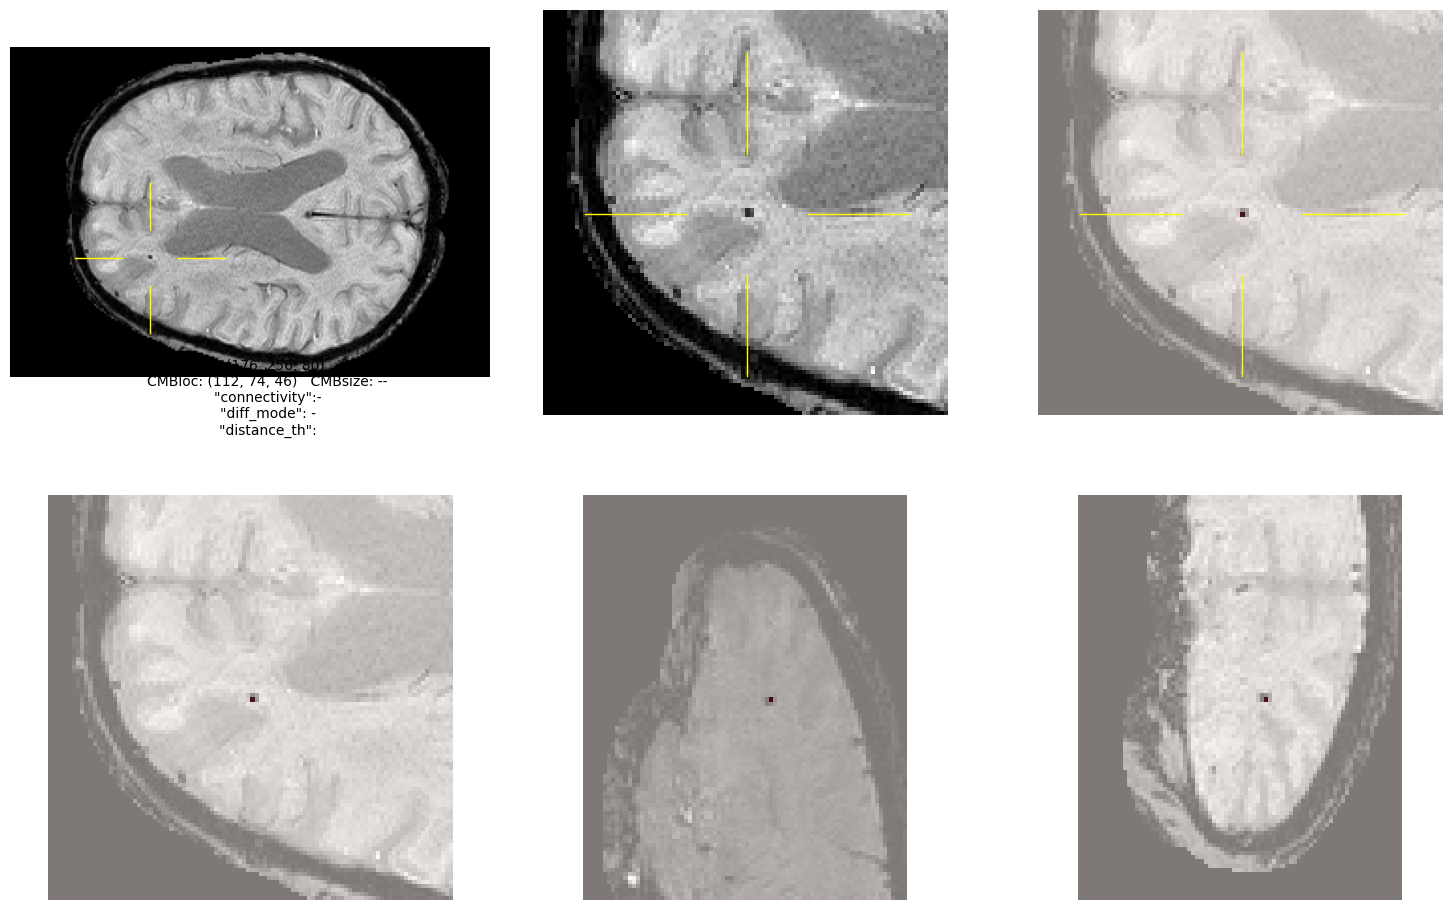

(64, 173, 8)


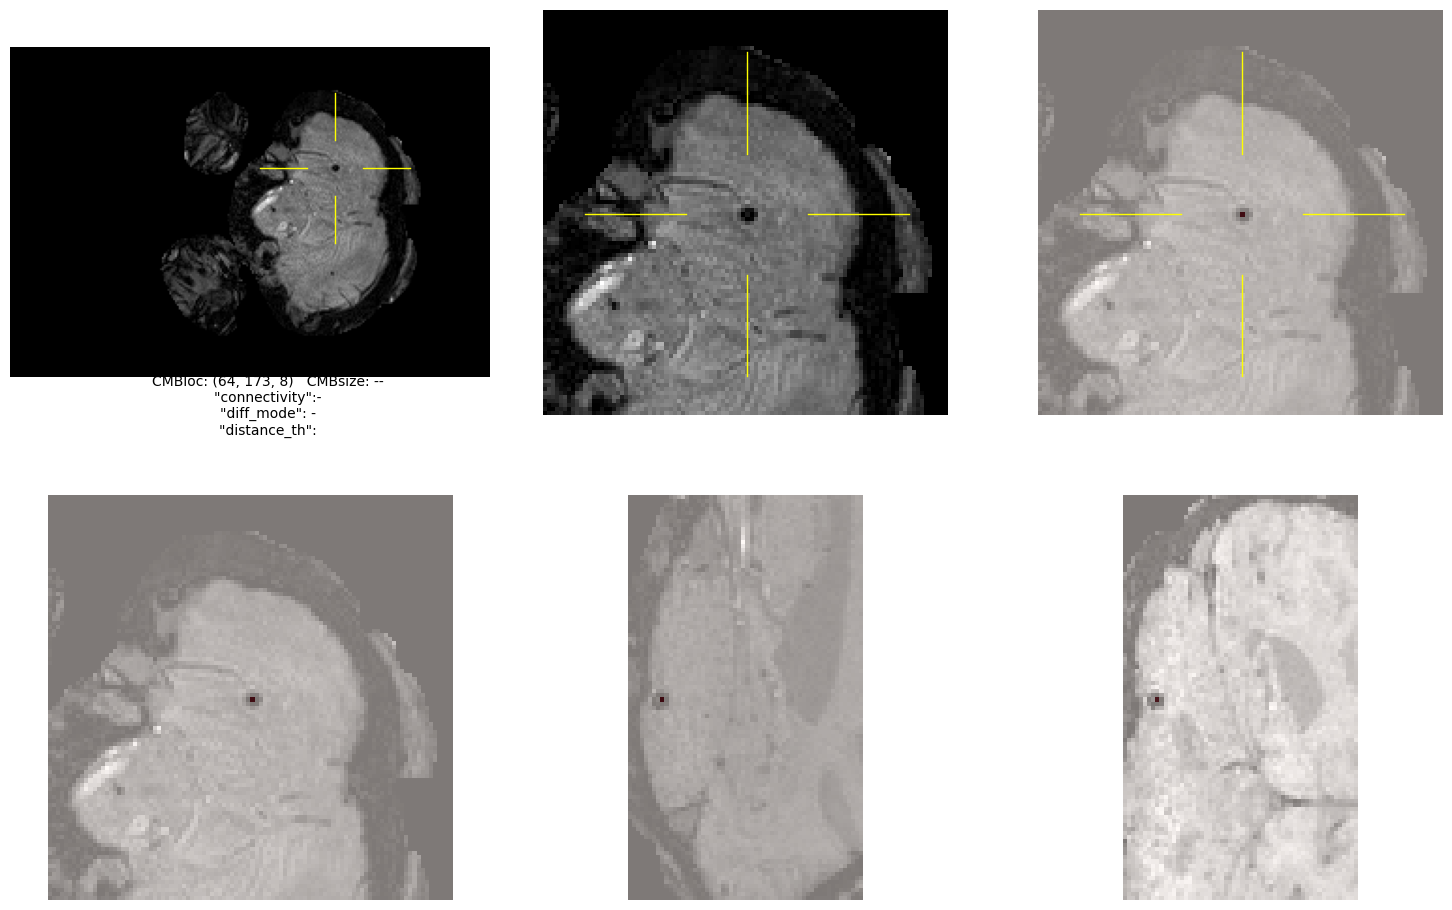

------------------------------------------------
242_T1_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(128, 179, 37)]
(128, 179, 37)


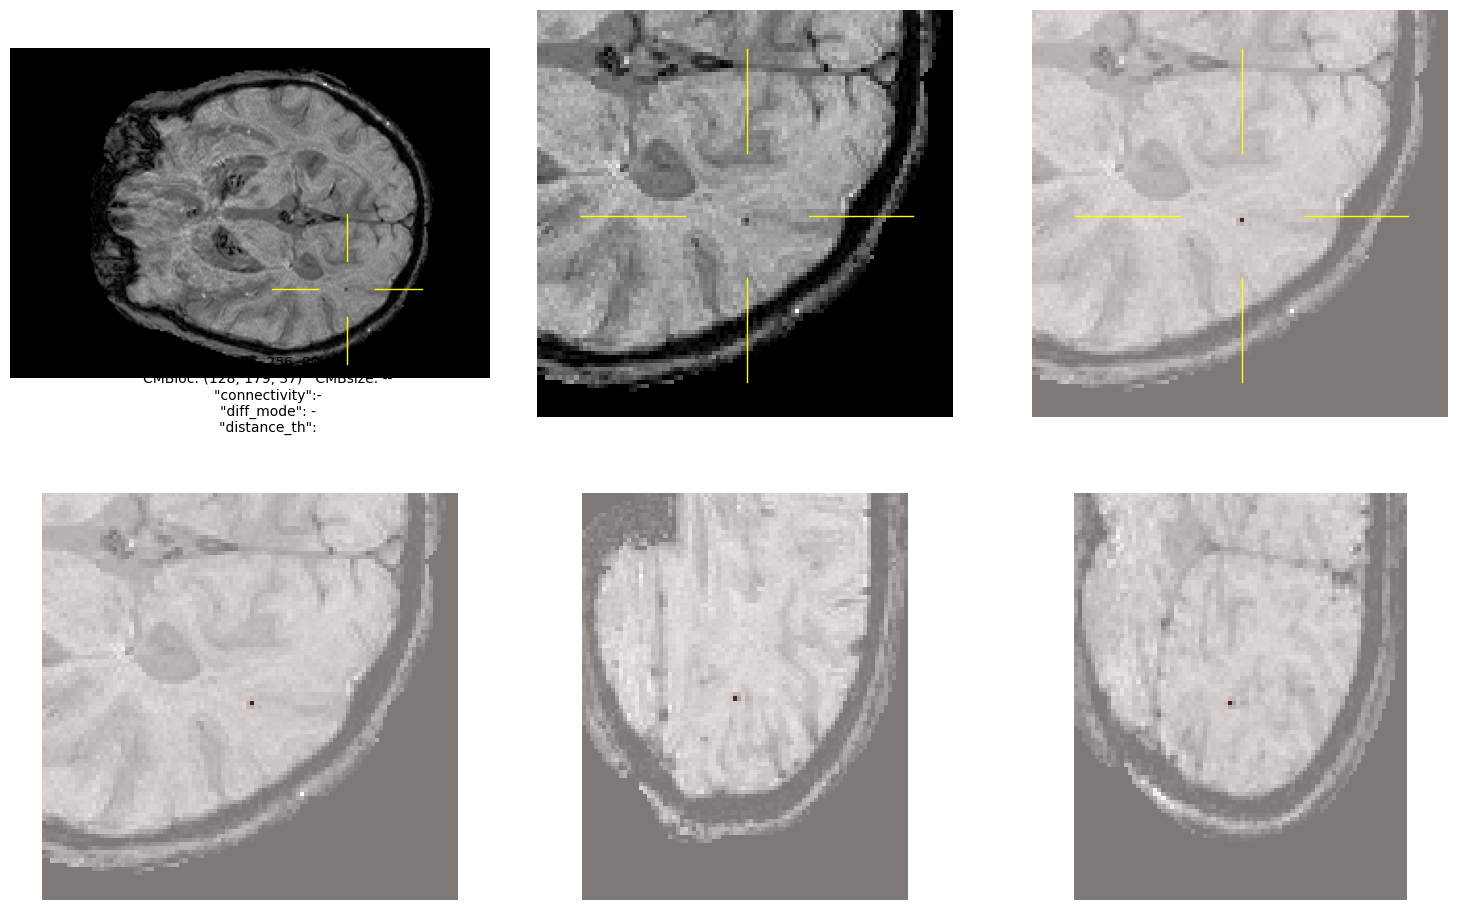

------------------------------------------------
316_T0_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(125, 202, 42), (97, 224, 33)]
(125, 202, 42)


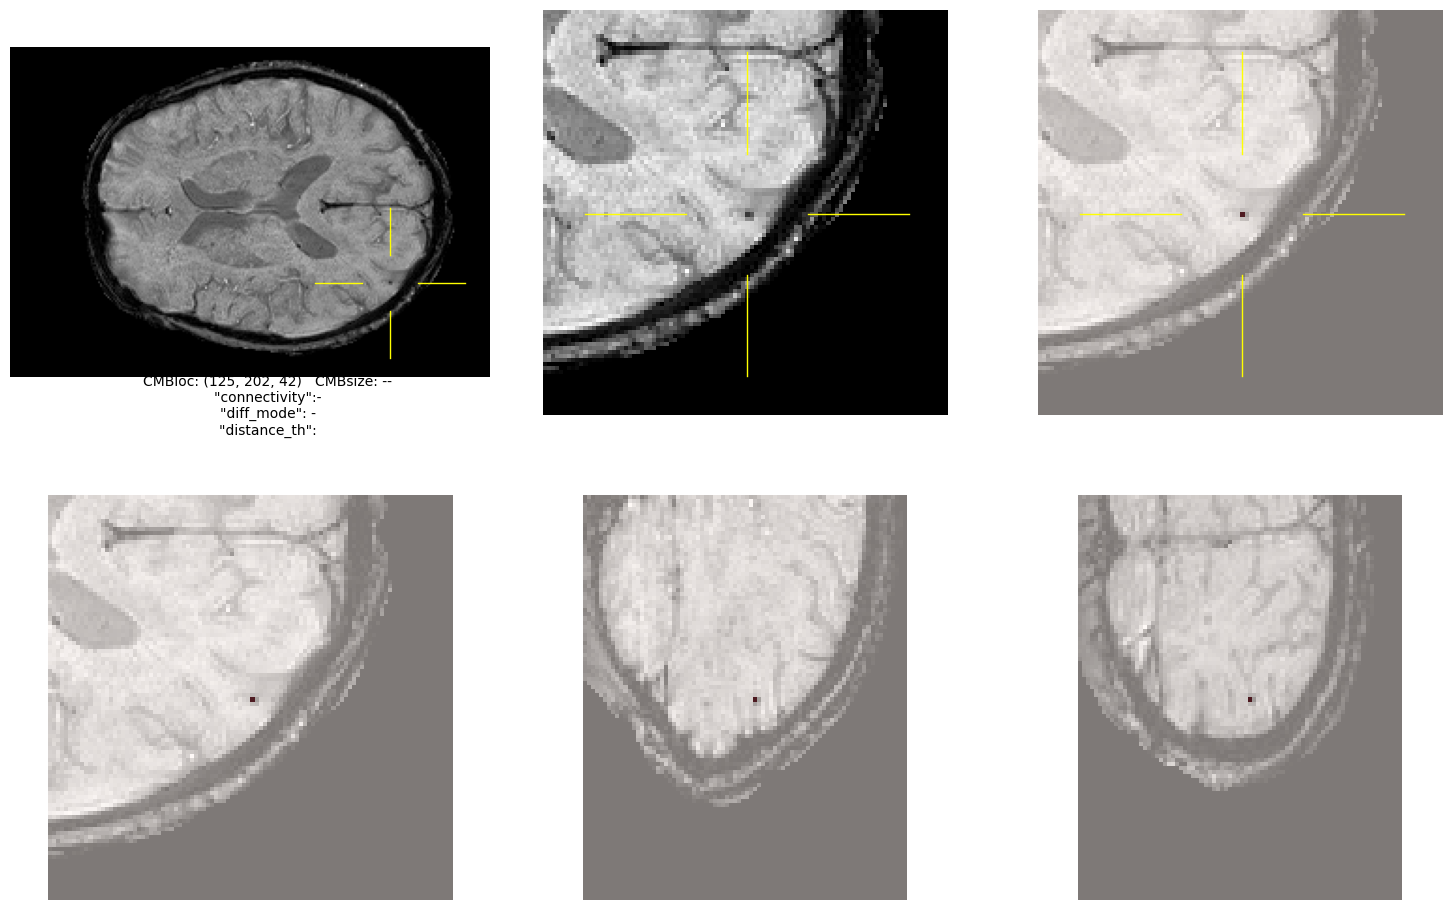

(97, 224, 33)


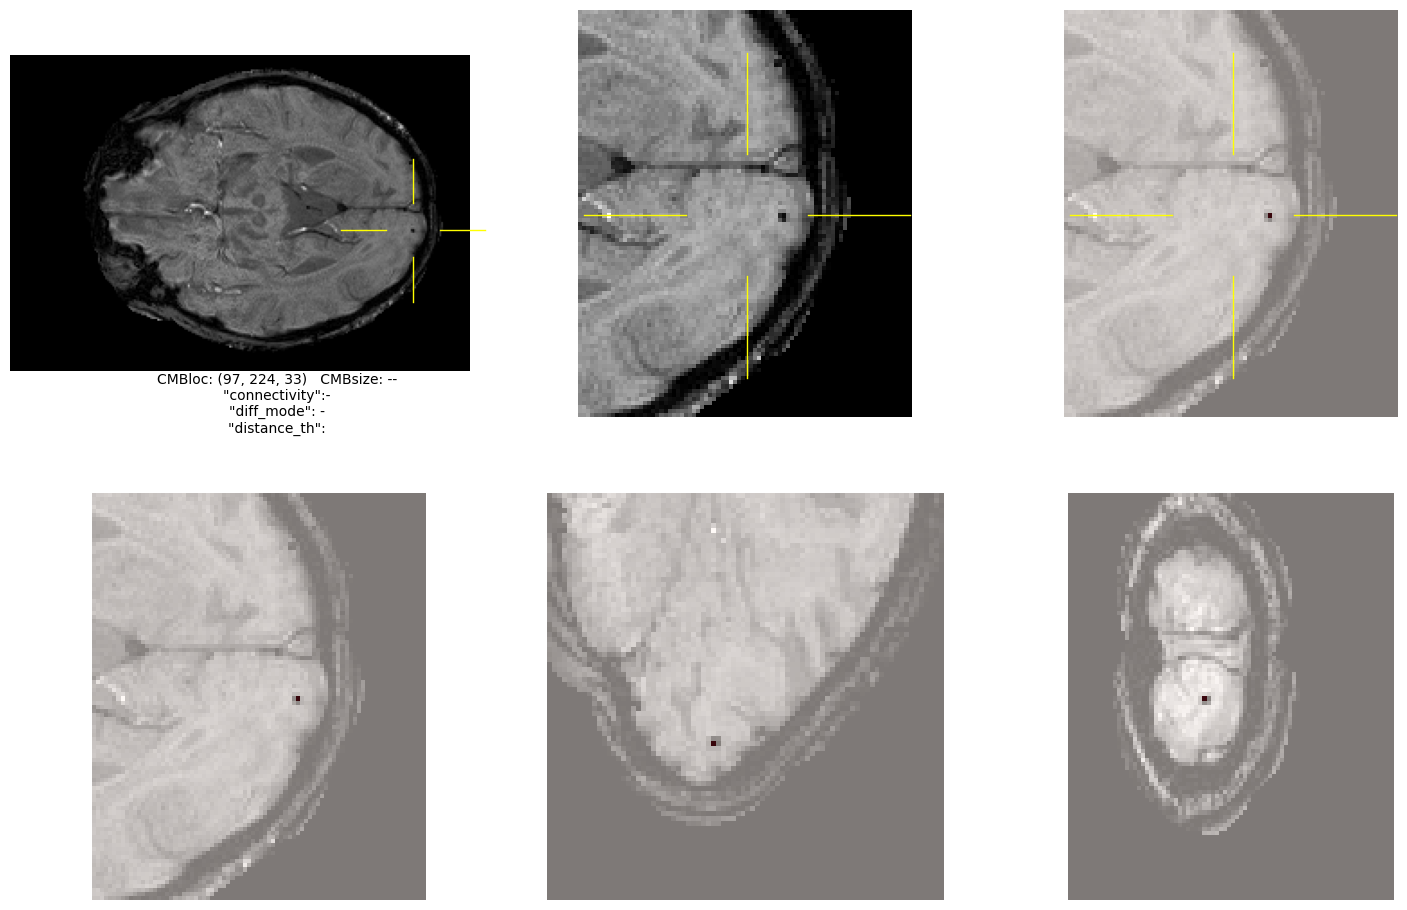

------------------------------------------------
260_T2_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(52, 156, 48)]
(52, 156, 48)


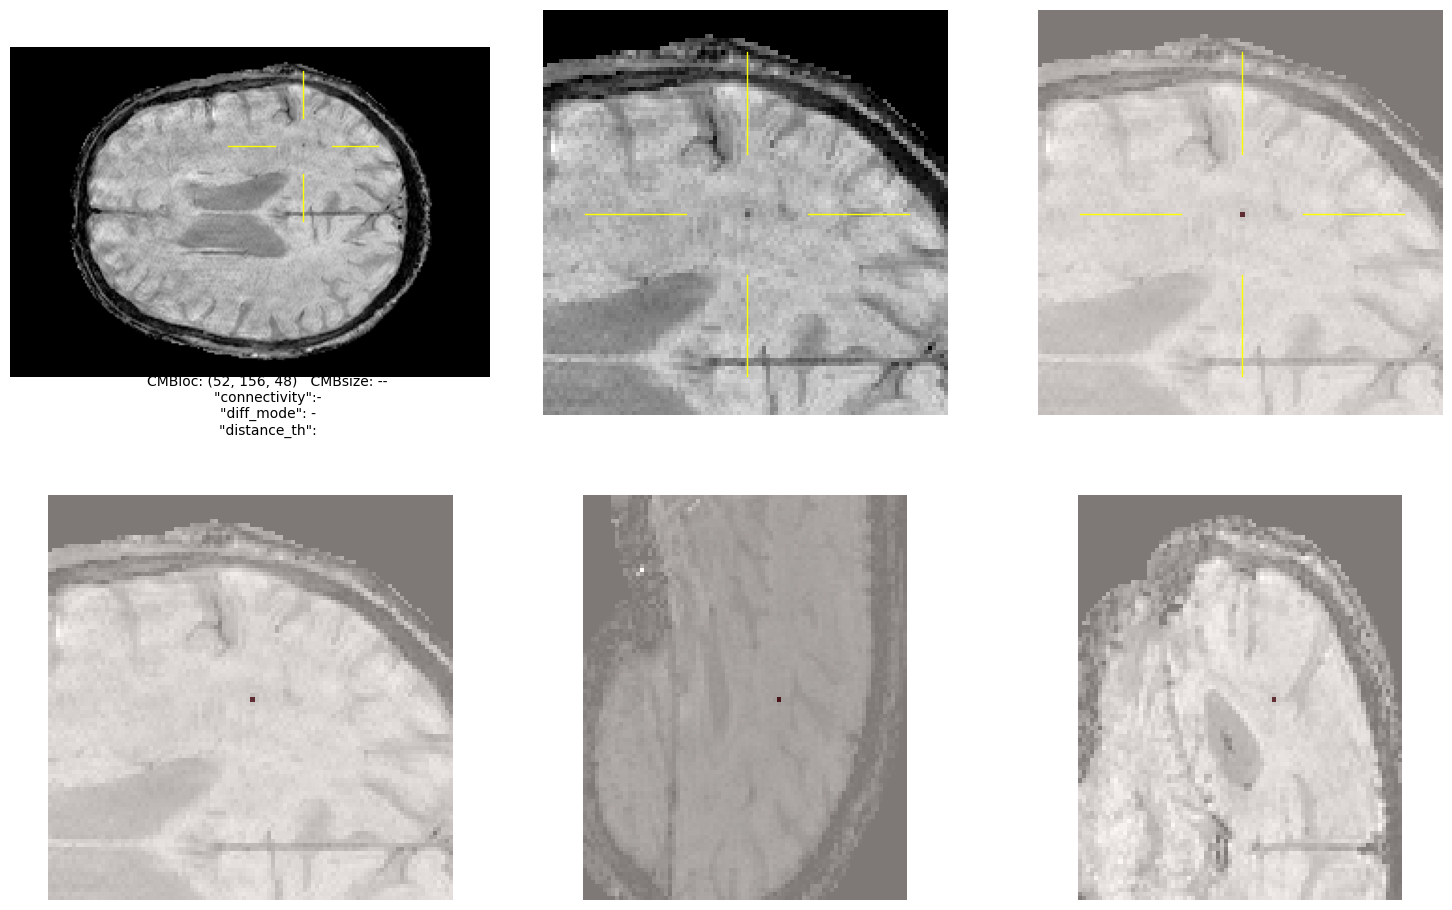

------------------------------------------------
249_T1_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(91, 142, 20)]
(91, 142, 20)


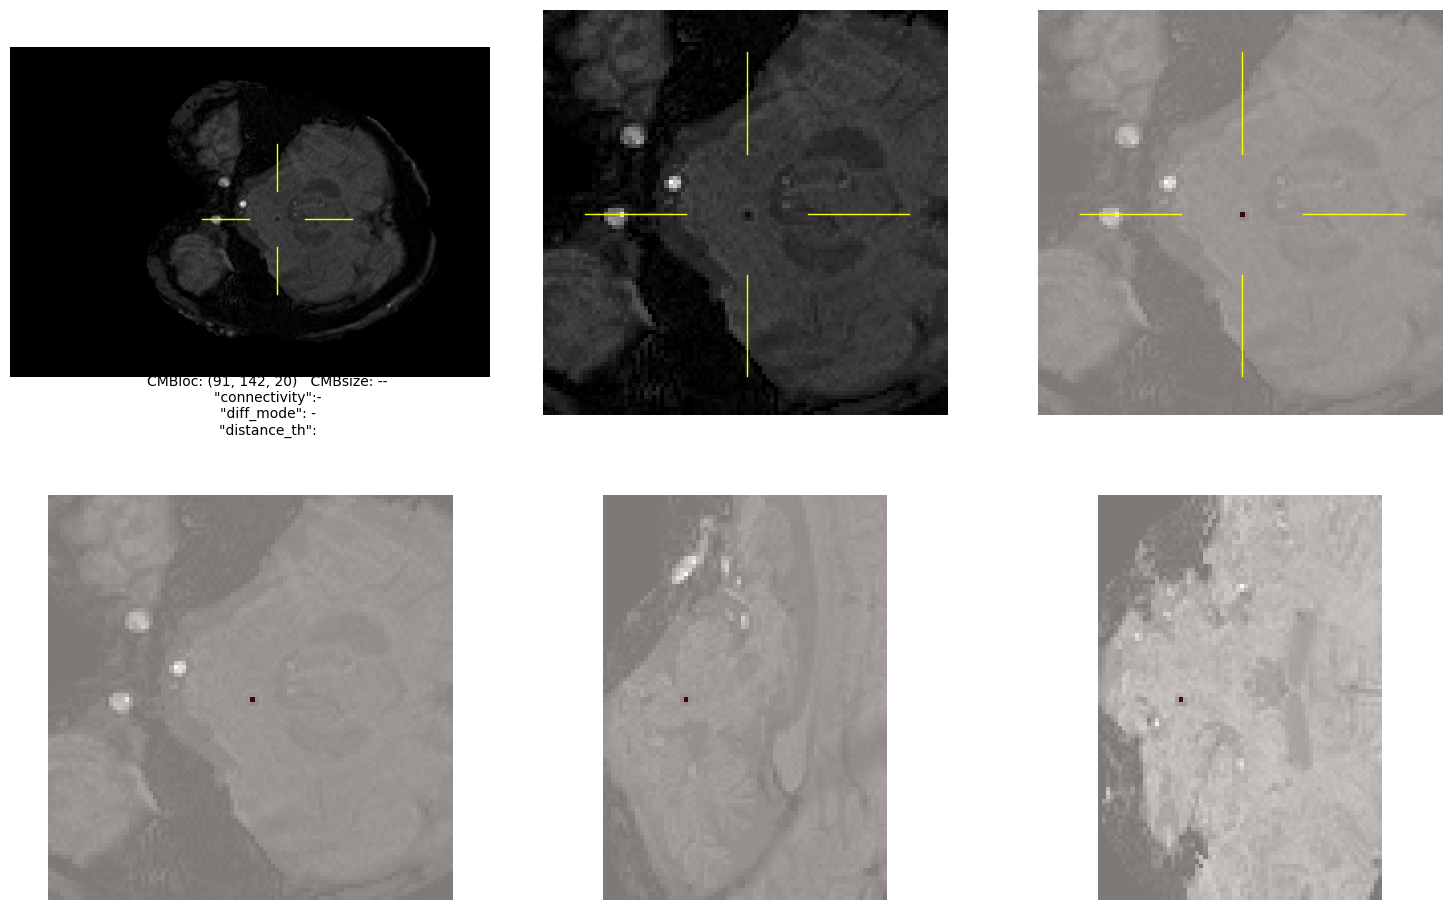

------------------------------------------------
276_T2_MRI_SWI_BFC_50mm_HM
------------------------------------------------
CMBs: [(123, 191, 42)]
(123, 191, 42)


KeyboardInterrupt: 

In [8]:
results = {}
subjects_temp = subjects
subjects_temp = [subjects[2]]
for subject in subjects_temp:
    print("------------------------------------------------")
    print(subject)
    print("------------------------------------------------")

    # Load data
    args = Args()
    sequences_raw, labels_raw, sequence_type, com_list, msg = load_MOMENI_raw(args.input_dir, subject, "", "")
    # sequences_qc, labels_qc, labels_metadata, msg = perform_MOMENI_QC(subject, sequences_raw, labels_raw, com_list, "")

    mri_im_raw = sequences_raw[sequence_type]
    rawcmb_im_raw = labels_raw[sequence_type]
    grownmask_raw = labels_raw[sequence_type]

    # results[subject] = {
    #     "raw": (sequences_raw, labels_raw, sequence_type, com_list),
    #     "qc": (sequences_qc, labels_qc, labels_metadata, msg)
    # }
    print(f"CMBs: {com_list}")
    # print(msg)

    # print(f"shape: {mri_im_raw.shape}")

    # Plotting processed masks for each center of mass
    for i, CM in enumerate(com_list):
        print(CM)
        filename_temp = os.path.join("/home/cerebriu/Downloads", f"MOMENI_{subject}.png")                                
        metadata_str = f"""shape: {mri_im_raw.shape}
        CMBloc: {CM}   CMBsize: --
        "connectivity":-
        "diff_mode": -
        "distance_th":"""
        utils_plt.plot_processed_mask_2x3(mri_im_raw, rawcmb_im_raw, grownmask_raw, CM, 100, metadata_str=metadata_str, save_path=filename_temp)